In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 5

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
        
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]

            line = np.array(line)


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()

    


In [6]:
def plot(points, title = 'title', picname = "noname"):

    #prepare plot
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
    np.shape(points)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()

    tmask.shape

    griddata=0.0*tmask[0,0,:,:]
    griddata.shape
    np.shape(points)[0]

    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)


    Jedges.shape



    griddata.shape

    


    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)


    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])

    Jedges,Iedges=np.meshgrid(jedges,iedges)

    Jedges.shape

    griddata.shape

    xl=(-126,-121.4)
    yl=(47,51)
    


    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title(title)
    
    el = Ellipse((2, -1), 0.5, 0.5)

#     axs2.annotate(
#             "IONA",
#             xy=(Iona[0], Iona[1]), xytext=(50, 10),
#             textcoords='offset points', ha='left', va='bottom', color = (0.937, 0.439, 0.043),
#             arrowprops=dict(arrowstyle="wedge,tail_width=1.",
#                                       fc=(1,1,1), ec=(1., .5, .5),
#                                       patchA=None,
#                                       patchB=el,
#                                       relpos=(0.2, 0.8),
#                                       connectionstyle="arc3,rad=-0.1"))



#     axs2.annotate(
#             "JUAN DE FUCA",
#             xy=(-124,48.21), xytext=(50, 10),
#             textcoords='offset points', ha='left', va='top', color = 'white')

    
    
    print ("plot ok")
    
    print (pos)
    
    plt.savefig(picname)

In [7]:
year1 = []
year2 = []
year3 = []

for file in dirs:
    month = get_pts(file)
    year1 += month [0::3]
    year2 += month [1::3]
    year3 += month [2::3]


start 20160101_20160131_427d:  2017-04-20 14:58:10.282884
time:  0:03:24.608454
start 20160201_20160229_401d:  2017-04-20 15:01:34.891826
time:  0:03:04.760946
start 20160301_20160331_355d:  2017-04-20 15:04:39.653122
time:  0:04:36.245973
start 20160401_20160430_325d:  2017-04-20 15:09:15.899985
time:  0:03:54.547562
start 20160501_20160531_294d:  2017-04-20 15:13:10.448005
time:  0:02:58.530871
start 20160601_20160630_264d:  2017-04-20 15:16:08.979284
time:  0:02:03.641626
start 20160701_20160731_252d:  2017-04-20 15:18:12.621386
time:  0:01:58.727194
start 20160801_20160831_217d:  2017-04-20 15:20:11.348782
time:  0:01:49.744930
start 20160901_20160930_172d:  2017-04-20 15:22:01.094012
time:  0:01:43.662332
start 20161001_20161031_141d:  2017-04-20 15:23:44.756843
time:  0:01:16.996286
start 20161101_20161130_111d:  2017-04-20 15:25:01.754029
time:  0:00:52.918272
start 20161201_20161231_95d:  2017-04-20 15:25:54.754098
time:  0:00:46.095093


In [8]:
#check pickle later

start:  2017-04-20 15:26:41.989305
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


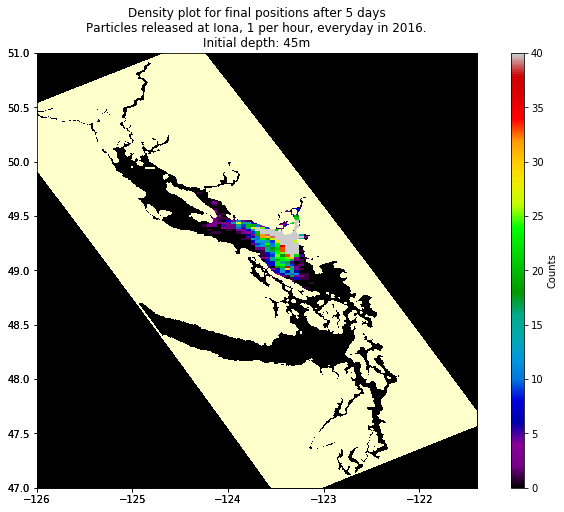

In [9]:
points = np.array(year1) #back to original name. convert to np.array

depth = 45

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

plot (points, title, picname)

start:  2017-04-20 15:26:43.127203
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


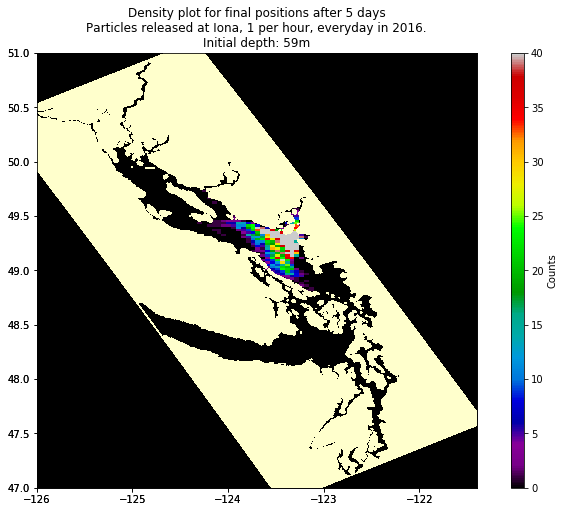

In [10]:
depth = 59

points = np.array(year2) #back to original name. convert to np.array

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)

start:  2017-04-20 15:26:44.176775
plot ok
Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88)


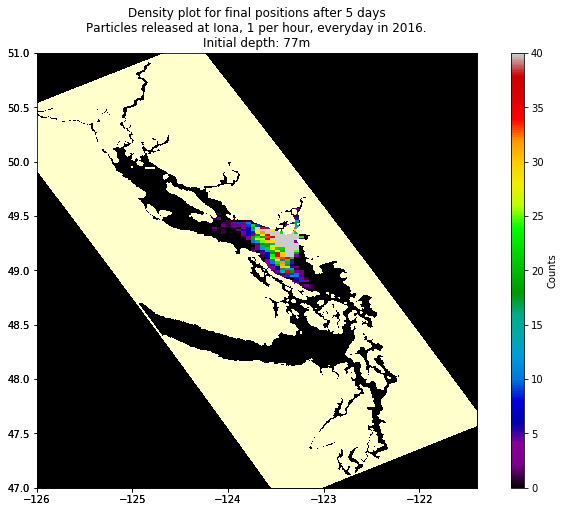

In [11]:
plt.clf()

points = np.array(year3) #back to original name. convert to np.array

depth = 77

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)